In [80]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from ast import literal_eval

In [81]:
dir_path = "/Users/admin/Documents/BT4012/Project/BT4012_Reviews/Notebooks/feature engineering"
os.chdir(dir_path)

In [82]:
df = pd.read_csv('Engineered.csv')

/var/folders/1t/nll74_0j61918pgb1cz1kwsr0000gn/T/ipykernel_73096/873903096.py:1: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Engineered.csv')


In [83]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'reviewDate', 'reviewID', 'reviewerID',
       'reviewContent', 'reviewRating', 'reviewUsefulCount', 'reviewCoolCount',
       'reviewFunnyCount', 'restaurantID', 'flagged', 'reviewerName',
       'reviewerLocation', 'reviewerYelpJoinDate', 'reviewerFriendCount',
       'reviewerNumReviews', 'reviewerFirstCount', 'reviewerUsefulCount',
       'reviewerCoolCount', 'reviewerFunnyCount', 'reviewerComplimentCount',
       'reviewerTipCount', 'reviewerFanCount', 'resLocation', 'resName',
       'resReviewCount', 'resRating', 'DATE_TIME', 'EMAIL_ADDRESS', 'NRP',
       'LOCATION', 'PERSON', 'PHONE_NUMBER', 'DATE_TIME_count',
       'EMAIL_ADDRESS_count', 'NRP_count', 'LOCATION_count', 'PERSON_count',
       'PHONE_NUMBER_count', 'DATE_TIME_flag', 'EMAIL_ADDRESS_flag',
       'NRP_flag', 'LOCATION_flag', 'PERSON_flag', 'PHONE_NUMBER_flag',
       'reviewDate2', 'date_diff_joinedandreviewed', 'word_count',
       'char_count', 'tokens', 'clean_tokens', 'cle

In [84]:
df = pd.DataFrame(df)

In [85]:
df

,Unnamed: 0.1,Unnamed: 0,reviewDate,reviewID,reviewerID,reviewContent,reviewRating,reviewUsefulCount,reviewCoolCount,reviewFunnyCount,...,ngrams,preprocessed,Num_Char,Num_Punc,verb_count,adj_count,sentiment,polarity,subjectivity,main_topic
0,0,0,9/22/2012,GtwU21YOQn-wf4vWRUIx6w,bNYesZ944s6IJVowOnB0iA,"Unlike Next, which we'd eaten at the previous ...",5,0,0,0,...,"[('unlike', 'next'), ('next', 'eaten'), ('eate...","['unlike', 'next', 'wed', 'eaten', 'previous',...",4890,143,170,50,"Sentiment(polarity=0.13913951545530495, subjec...",1.391395e-01,0.528655,33
1,1,1,9/22/2012,0LpVTc3,TRKxLC3y-ZvP45e5iilMtw,Probably one of the best meals I've had ever. ...,5,0,0,0,...,"[('probably', 'one'), ('one', 'best'), ('best'...","['probably', 'one', 'best', 'meal', 'ive', 'ev...",350,10,15,8,"Sentiment(polarity=0.4666666666666666, subject...",4.666667e-01,0.566667,10
2,2,2,9/19/2012,tljtLzf68Fkwf,0EMm8umAqXZzyhxNpL4M9g,Service was impeccable. Experience and present...,3,2,0,0,...,"[('service', 'impeccable'), ('impeccable', 'ex...","['service', 'impeccable', 'experience', 'prese...",257,9,14,5,"Sentiment(polarity=0.4133333333333334, subject...",4.133333e-01,0.720000,18
3,3,3,9/6/2012,iSN,DlwexC7z88ymAzu45skODw,"The problem with places like this, given the e...",3,8,0,3,...,"[('problem', 'places'), ('places', 'like'), ('...","['problem', 'place', 'like', 'given', 'exhorbi...",2156,84,52,34,"Sentiment(polarity=0.12054824561403507, subjec...",1.205482e-01,0.535201,33
4,4,4,9/9/2012,Jmwrh7,kW2dk1CWihmh3g7k9N2G8A,I have no idea how to write my review - dining...,5,1,2,0,...,"[('idea', 'write'), ('write', 'review'), ('rev...","['idea', 'write', 'review', 'dining', 'alinea'...",951,29,27,20,"Sentiment(polarity=0.16746031746031745, subjec...",1.674603e-01,0.564683,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26951,26951,26951,3/17/2010,PZu8sDx2T2,tivh8lr6pzBDNfrJLYWh_g,"It's Taco Bell, with higher prices, but it's T...",4,0,0,1,...,"[('taco', 'bell'), ('bell', 'higher'), ('highe...","['taco', 'bell', 'higher', 'price', 'taco', 'b...",512,16,23,6,"Sentiment(polarity=0.22662337662337664, subjec...",2.266234e-01,0.760173,29
26952,26952,26952,4/14/2011,S-zbPPGoB,jKs4FQgkV0wSX8BG2_dgTg,Yellow Rose is a favorite of mine. I'd go ther...,5,0,0,0,...,"[('yellow', 'rose'), ('rose', 'favorite'), ('f...","['yellow', 'rose', 'favorite', 'mine', 'id', '...",522,17,17,9,"Sentiment(polarity=0.2692708333333333, subject...",2.692708e-01,0.608333,34
26953,26953,26953,9/23/2007,roKqXYooTy49OMAIJJjf,vX6aOMQ3HWCbwZVfCkCauw,Not bad. We ate there because the odd wicker s...,3,0,1,0,...,"[('bad', 'ate'), ('ate', 'odd'), ('odd', 'wick...","['bad', 'ate', 'odd', 'wicker', 'seat', 'invit...",209,8,6,5,"Sentiment(polarity=-0.119047619047619, subject...",-1.190476e-01,0.588095,10
26954,26954,26954,11/18/2011,FefmFaWa,vX6aOMQ3HWCbwZVfCkCauw,We were surprised to have been eagerly roped i...,3,0,0,0,...,"[('surprised', 'eagerly'), ('eagerly', 'roped'...","['surprised', 'eagerly', 'roped', 'pop', 'triv...",347,12,15,5,"Sentiment(polarity=6.938893903907228e-18, subj...",6.938894e-18,0.658333,21


Scaling

In [86]:
scaler = MinMaxScaler()
cols_to_scale = ['reviewUsefulCount', 'reviewCoolCount', 'reviewFunnyCount', 'reviewerFriendCount', 'reviewerNumReviews', 'reviewerFirstCount', 'reviewerUsefulCount', 'reviewerCoolCount', 
                 'reviewerFunnyCount', 'reviewerComplimentCount', 'reviewerTipCount', 'reviewerFanCount', 'DATE_TIME_count', 'EMAIL_ADDRESS_count', 'NRP_count', 'LOCATION_count', 'PERSON_count',
                 'PHONE_NUMBER_count', 'date_diff_joinedandreviewed', 'main_topic', 'Num_Char', 'Num_Punc', 'verb_count', 'adj_count']
df_scaled = df.copy()
df_scaled[cols_to_scale] = scaler.fit_transform(df_scaled[cols_to_scale])

In [87]:
df_scaled

,Unnamed: 0.1,Unnamed: 0,reviewDate,reviewID,reviewerID,reviewContent,reviewRating,reviewUsefulCount,reviewCoolCount,reviewFunnyCount,...,ngrams,preprocessed,Num_Char,Num_Punc,verb_count,adj_count,sentiment,polarity,subjectivity,main_topic
0,0,0,9/22/2012,GtwU21YOQn-wf4vWRUIx6w,bNYesZ944s6IJVowOnB0iA,"Unlike Next, which we'd eaten at the previous ...",5,0.000000,0.00,0.000000,...,"[('unlike', 'next'), ('next', 'eaten'), ('eate...","['unlike', 'next', 'wed', 'eaten', 'previous',...",0.978779,0.446875,0.776256,0.427350,"Sentiment(polarity=0.13913951545530495, subjec...",1.391395e-01,0.528655,0.868421
1,1,1,9/22/2012,0LpVTc3,TRKxLC3y-ZvP45e5iilMtw,Probably one of the best meals I've had ever. ...,5,0.000000,0.00,0.000000,...,"[('probably', 'one'), ('one', 'best'), ('best'...","['probably', 'one', 'best', 'meal', 'ive', 'ev...",0.069870,0.031250,0.068493,0.068376,"Sentiment(polarity=0.4666666666666666, subject...",4.666667e-01,0.566667,0.263158
2,2,2,9/19/2012,tljtLzf68Fkwf,0EMm8umAqXZzyhxNpL4M9g,Service was impeccable. Experience and present...,3,0.040816,0.00,0.000000,...,"[('service', 'impeccable'), ('impeccable', 'ex...","['service', 'impeccable', 'experience', 'prese...",0.051251,0.028125,0.063927,0.042735,"Sentiment(polarity=0.4133333333333334, subject...",4.133333e-01,0.720000,0.473684
3,3,3,9/6/2012,iSN,DlwexC7z88ymAzu45skODw,"The problem with places like this, given the e...",3,0.163265,0.00,0.057692,...,"[('problem', 'places'), ('places', 'like'), ('...","['problem', 'place', 'like', 'given', 'exhorbi...",0.431431,0.262500,0.237443,0.290598,"Sentiment(polarity=0.12054824561403507, subjec...",1.205482e-01,0.535201,0.868421
4,4,4,9/9/2012,Jmwrh7,kW2dk1CWihmh3g7k9N2G8A,I have no idea how to write my review - dining...,5,0.020408,0.04,0.000000,...,"[('idea', 'write'), ('write', 'review'), ('rev...","['idea', 'write', 'review', 'dining', 'alinea'...",0.190190,0.090625,0.123288,0.170940,"Sentiment(polarity=0.16746031746031745, subjec...",1.674603e-01,0.564683,0.868421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26951,26951,26951,3/17/2010,PZu8sDx2T2,tivh8lr6pzBDNfrJLYWh_g,"It's Taco Bell, with higher prices, but it's T...",4,0.000000,0.00,0.019231,...,"[('taco', 'bell'), ('bell', 'higher'), ('highe...","['taco', 'bell', 'higher', 'price', 'taco', 'b...",0.102302,0.050000,0.105023,0.051282,"Sentiment(polarity=0.22662337662337664, subjec...",2.266234e-01,0.760173,0.763158
26952,26952,26952,4/14/2011,S-zbPPGoB,jKs4FQgkV0wSX8BG2_dgTg,Yellow Rose is a favorite of mine. I'd go ther...,5,0.000000,0.00,0.000000,...,"[('yellow', 'rose'), ('rose', 'favorite'), ('f...","['yellow', 'rose', 'favorite', 'mine', 'id', '...",0.104304,0.053125,0.077626,0.076923,"Sentiment(polarity=0.2692708333333333, subject...",2.692708e-01,0.608333,0.894737
26953,26953,26953,9/23/2007,roKqXYooTy49OMAIJJjf,vX6aOMQ3HWCbwZVfCkCauw,Not bad. We ate there because the odd wicker s...,3,0.000000,0.02,0.000000,...,"[('bad', 'ate'), ('ate', 'odd'), ('odd', 'wick...","['bad', 'ate', 'odd', 'wicker', 'seat', 'invit...",0.041642,0.025000,0.027397,0.042735,"Sentiment(polarity=-0.119047619047619, subject...",-1.190476e-01,0.588095,0.263158
26954,26954,26954,11/18/2011,FefmFaWa,vX6aOMQ3HWCbwZVfCkCauw,We were surprised to have been eagerly roped i...,3,0.000000,0.00,0.000000,...,"[('surprised', 'eagerly'), ('eagerly', 'roped'...","['surprised', 'eagerly', 'roped', 'pop', 'triv...",0.069269,0.037500,0.068493,0.042735,"Sentiment(polarity=6.938893903907228e-18, subj...",6.938894e-18,0.658333,0.552632


NaN Values

In [88]:
columns_with_nan = df_scaled.columns[df.isna().any()].tolist()

print("Columns with NaN values:")
print(columns_with_nan)

Columns with NaN values:
['reviewID', 'reviewerLocation', 'DATE_TIME', 'EMAIL_ADDRESS', 'NRP', 'LOCATION', 'PERSON', 'PHONE_NUMBER', 'clean_text']


In [89]:
# to fill with empty list
unknown_cols = ['DATE_TIME', 'EMAIL_ADDRESS', 'NRP', 'LOCATION', 'PERSON', 'PHONE_NUMBER']

for col in unknown_cols:
    df_scaled[col].fillna("[]", inplace=True)

OHE for 'reviewRating'

In [90]:
df_scaled_encoded = pd.get_dummies(df_scaled, columns=['reviewRating'], prefix='reviewRating')

Adding back initial 'reviewRating' column

In [91]:
df_scaled_encoded['reviewRating'] = df_scaled['reviewRating']

Drop useless Columns

``` reviewUsefulCount, reviewCoolCount and reviewFunnyCount would be dropped due to the problem of data leakage. Since the counts on these reviews would only be known a while after the review is posted, this information is not accessible to us when the review is posted immediately. Thus, having these columns would only inaccurately result in high performance scores for the training set but low performance scores for the test dataset ```

In [92]:
final_df = df_scaled_encoded.drop(['Unnamed: 0.1', 'Unnamed: 0', 'reviewUsefulCount', 'reviewCoolCount', 'reviewFunnyCount'], axis=1)


In [93]:
final_df[final_df["flagged"]==1]["reviewerFriendCount"].describe()

count    6204.000000
mean        0.000533
std         0.008286
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         0.594560
Name: reviewerFriendCount, dtype: float64

In [94]:
final_df.columns

Index(['reviewDate', 'reviewID', 'reviewerID', 'reviewContent', 'restaurantID',
       'flagged', 'reviewerName', 'reviewerLocation', 'reviewerYelpJoinDate',
       'reviewerFriendCount', 'reviewerNumReviews', 'reviewerFirstCount',
       'reviewerUsefulCount', 'reviewerCoolCount', 'reviewerFunnyCount',
       'reviewerComplimentCount', 'reviewerTipCount', 'reviewerFanCount',
       'resLocation', 'resName', 'resReviewCount', 'resRating', 'DATE_TIME',
       'EMAIL_ADDRESS', 'NRP', 'LOCATION', 'PERSON', 'PHONE_NUMBER',
       'DATE_TIME_count', 'EMAIL_ADDRESS_count', 'NRP_count', 'LOCATION_count',
       'PERSON_count', 'PHONE_NUMBER_count', 'DATE_TIME_flag',
       'EMAIL_ADDRESS_flag', 'NRP_flag', 'LOCATION_flag', 'PERSON_flag',
       'PHONE_NUMBER_flag', 'reviewDate2', 'date_diff_joinedandreviewed',
       'word_count', 'char_count', 'tokens', 'clean_tokens', 'clean_text',
       'ngrams', 'preprocessed', 'Num_Char', 'Num_Punc', 'verb_count',
       'adj_count', 'sentiment', 'polar

In [95]:
corr_matrix = final_df.drop(columns=["reviewContent","reviewerName","reviewDate", "reviewID","reviewerID", "restaurantID", "reviewerLocation","reviewerYelpJoinDate",'resLocation', 'resName', 'resReviewCount', 'resRating', 'DATE_TIME',
       'EMAIL_ADDRESS', 'NRP', 'LOCATION', 'PERSON', 'PHONE_NUMBER',
       'DATE_TIME_count', 'EMAIL_ADDRESS_count', 'NRP_count', 'LOCATION_count',
       'PERSON_count', 'PHONE_NUMBER_count', 'DATE_TIME_flag',
       'EMAIL_ADDRESS_flag', 'NRP_flag', 'LOCATION_flag', 'PERSON_flag',
       'PHONE_NUMBER_flag', 'reviewDate2','tokens', 'clean_tokens', 'clean_text', 'ngrams', 'preprocessed', "sentiment"])


<Axes: >

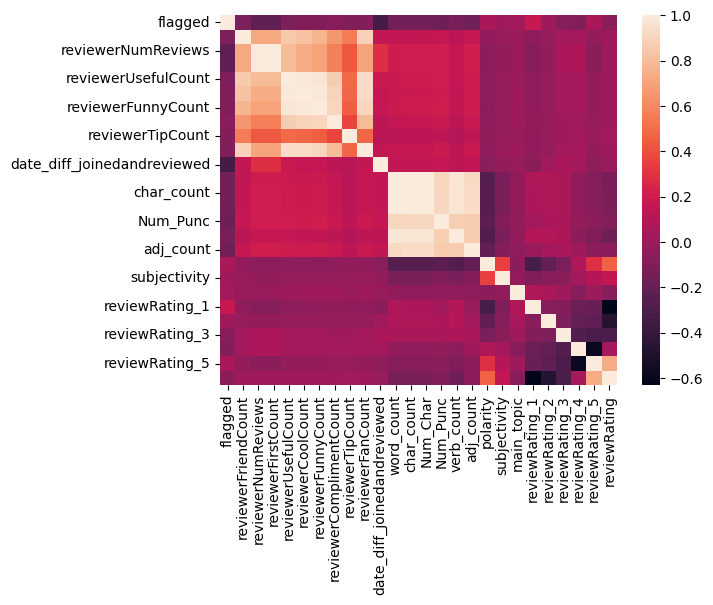

In [96]:

from statsmodels.stats.outliers_influence import variance_inflation_factor

corr_matrix.corr()

sns.heatmap(corr_matrix.corr())


In [97]:
final_df

,reviewDate,reviewID,reviewerID,reviewContent,restaurantID,flagged,reviewerName,reviewerLocation,reviewerYelpJoinDate,reviewerFriendCount,...,sentiment,polarity,subjectivity,main_topic,reviewRating_1,reviewRating_2,reviewRating_3,reviewRating_4,reviewRating_5,reviewRating
0,9/22/2012,GtwU21YOQn-wf4vWRUIx6w,bNYesZ944s6IJVowOnB0iA,"Unlike Next, which we'd eaten at the previous ...",pbEiXam9YJL3neCYHGwLUA,0,Scott E.,"Glengary, WV",2009-10-01,0.002337,...,"Sentiment(polarity=0.13913951545530495, subjec...",1.391395e-01,0.528655,0.868421,False,False,False,False,True,5
1,9/22/2012,0LpVTc3,TRKxLC3y-ZvP45e5iilMtw,Probably one of the best meals I've had ever. ...,pbEiXam9YJL3neCYHGwLUA,0,Jerry K.,"Palos Verdes Peninsula, CA",2011-06-01,0.000000,...,"Sentiment(polarity=0.4666666666666666, subject...",4.666667e-01,0.566667,0.263158,False,False,False,False,True,5
2,9/19/2012,tljtLzf68Fkwf,0EMm8umAqXZzyhxNpL4M9g,Service was impeccable. Experience and present...,pbEiXam9YJL3neCYHGwLUA,0,Patricia M.,"Chicago, IL",2008-09-01,0.000425,...,"Sentiment(polarity=0.4133333333333334, subject...",4.133333e-01,0.720000,0.473684,False,False,True,False,False,3
3,9/6/2012,iSN,DlwexC7z88ymAzu45skODw,"The problem with places like this, given the e...",pbEiXam9YJL3neCYHGwLUA,0,Terry N.,"San Jose, CA",2007-10-01,0.017850,...,"Sentiment(polarity=0.12054824561403507, subjec...",1.205482e-01,0.535201,0.868421,False,False,True,False,False,3
4,9/9/2012,Jmwrh7,kW2dk1CWihmh3g7k9N2G8A,I have no idea how to write my review - dining...,pbEiXam9YJL3neCYHGwLUA,0,Shradha Vegetarianista A.,"Chicago, IL",2007-07-01,0.070761,...,"Sentiment(polarity=0.16746031746031745, subjec...",1.674603e-01,0.564683,0.868421,False,False,False,False,True,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26951,3/17/2010,PZu8sDx2T2,tivh8lr6pzBDNfrJLYWh_g,"It's Taco Bell, with higher prices, but it's T...",v9qEDxi3t-P0CmGWAkkGvw,0,Kristen F.,"Chicago, IL",2006-04-01,0.006587,...,"Sentiment(polarity=0.22662337662337664, subjec...",2.266234e-01,0.760173,0.763158,False,False,False,True,False,4
26952,4/14/2011,S-zbPPGoB,jKs4FQgkV0wSX8BG2_dgTg,Yellow Rose is a favorite of mine. I'd go ther...,RRflazDtBkqqpvEz2hbV2w,0,Yvonne F.,IL,2007-01-01,0.001275,...,"Sentiment(polarity=0.2692708333333333, subject...",2.692708e-01,0.608333,0.894737,False,False,False,False,True,5
26953,9/23/2007,roKqXYooTy49OMAIJJjf,vX6aOMQ3HWCbwZVfCkCauw,Not bad. We ate there because the odd wicker s...,zI0E_yruu58ea-xq9aHi-w,0,Saverio T.,"Chicago, IL",2007-09-01,0.002762,...,"Sentiment(polarity=-0.119047619047619, subject...",-1.190476e-01,0.588095,0.263158,False,False,True,False,False,3
26954,11/18/2011,FefmFaWa,vX6aOMQ3HWCbwZVfCkCauw,We were surprised to have been eagerly roped i...,6XVXM78gBuU3gpq2hTOgJA,0,Saverio T.,"Chicago, IL",2007-09-01,0.002762,...,"Sentiment(polarity=6.938893903907228e-18, subj...",6.938894e-18,0.658333,0.552632,False,False,True,False,False,3


Output to csv

In [98]:
final_df.to_csv('data_cleaned.csv', index=False)